In [1]:
#Package import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns     
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [2]:
#Data Retrieval
data = pd.read_csv('Placement_Data_Full_Class.csv')
campusData = data

### Data Preparation

In [3]:
#Dataset info
print('Shape of dataset', campusData.shape)
print('Dataset type', campusData.dtypes)
campusData.head()

Shape of dataset (215, 15)
Dataset type sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


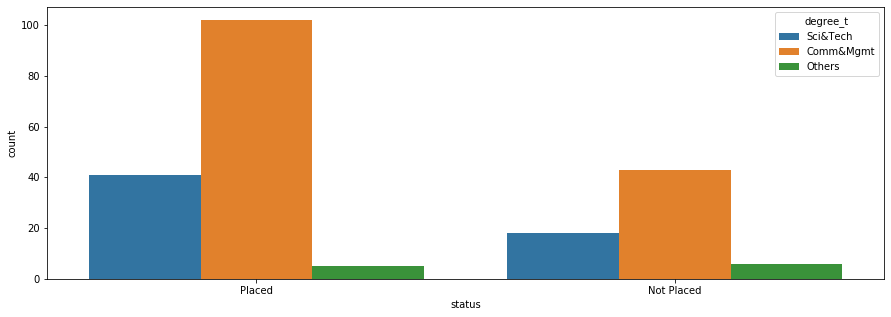

status      degree_t 
Not Placed  Comm&Mgmt     43
            Others         6
            Sci&Tech      18
Placed      Comm&Mgmt    102
            Others         5
            Sci&Tech      41
dtype: int64

In [4]:
#Plotting
plt.subplots(figsize = (15,5))
sns.countplot(x=campusData['status'],order=campusData['status'].value_counts().index,hue=campusData['degree_t'])
plt.show()
campusData[['status','degree_t']].groupby(['status', 'degree_t']).size()

In [5]:
#Drop sl_no and salary
campusData = campusData.drop(['sl_no', 'salary'], axis=1)
campusData.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [6]:
#label and features
features = campusData.drop(['status'], axis=1)
labels = campusData['status']

In [7]:
#One hot encode
featurescategorical = features[['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']]
featuresnumerical = features[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]

# One-hot encode the data using pandas get_dummies
featurescategorical = pd.get_dummies(featurescategorical)

features = pd.concat([featurescategorical, featuresnumerical], axis=1, sort=False)
features.head()

,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,...,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,0,1,0,1,0,1,0,1,0,0,...,1,1,0,0,1,67.00,91.00,58.00,55.0,58.80
1,0,1,1,0,0,1,0,0,1,0,...,1,0,1,1,0,79.33,78.33,77.48,86.5,66.28
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,1,0,65.00,68.00,64.00,75.0,57.80
3,0,1,1,0,1,0,0,0,1,0,...,1,1,0,0,1,56.00,52.00,52.00,66.0,59.43
4,0,1,1,0,1,0,0,1,0,1,...,0,1,0,1,0,85.80,73.60,73.30,96.8,55.50


### Random Forest Modelling

In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#create package object
rfModel = RandomForestClassifier(n_estimators=100)

In [9]:
#Perform k=5 fold cross validation
predictions = cross_val_predict(rfModel, features, labels, cv=5)
predictions[0:5]

array(['Placed', 'Placed', 'Placed', 'Not Placed', 'Placed'], dtype=object)

In [10]:
#Scoring
accuracy_score(labels, predictions)

0.8558139534883721

### Naive Bayes Modelling

In [11]:
#import naive bayes
from sklearn.naive_bayes import GaussianNB

#create package object
nb = GaussianNB()


In [12]:
#Perform k=5 fold cross validation
predictions = cross_val_predict(nb, features, labels, cv=5)
predictions[0:5]

array(['Placed', 'Placed', 'Not Placed', 'Not Placed', 'Placed'],
      dtype='<U10')

In [13]:
#Scoring
accuracy_score(labels, predictions)

0.7581395348837209

### KNN Modelling

In [14]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [15]:
#Perform k=5 fold cross validation
predictions = cross_val_predict(knn, features, labels, cv=5)
predictions[0:5]

array(['Placed', 'Placed', 'Placed', 'Not Placed', 'Placed'], dtype=object)

In [16]:
#Scoring
accuracy_score(labels, predictions)

0.8418604651162791

#### Random Forest can predict better than Naive Bayes and KNN for campus recruitement dataset with 85% score